In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_C_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,NaN,NaN,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,NaN,NaN,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,NaN,-0.26569,-0.20468,-0.18401,-0.19040,NaN,-0.16626,-0.06288,NaN,-0.02447
2,NaN,NaN,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,NaN,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,NaN,0.56045,-0.38238
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,NaN,...,1.00000,0.90695,0.51613,NaN,NaN,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,NaN,0.0,1.00000,NaN,0.94140,NaN,0.92106,NaN,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,NaN,NaN,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,NaN,0.0,0.83508,0.08298,NaN,NaN,0.84349,-0.05567,0.90441,NaN,...,0.95378,-0.04202,0.83479,NaN,1.00000,0.12815,0.86660,NaN,0.90546,-0.04307
347,NaN,0.0,NaN,0.00419,0.95183,NaN,0.93438,-0.01920,0.94590,0.01606,...,0.94520,NaN,0.93522,0.04925,NaN,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1.0,0.0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,NaN,...,0.93988,0.03193,NaN,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1.0,NaN,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,NaN,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	67
float64		column 2	76
float64		column 3	60
float64		column 4	74
float64		column 5	62
float64		column 6	61
float64		column 7	79
float64		column 8	68
float64		column 9	64
float64		column 10	76
float64		column 11	77
float64		column 12	71
float64		column 13	67
float64		column 14	71
float64		column 15	68
float64		column 16	73
float64		column 17	67
float64		column 18	66
float64		column 19	71
float64		column 20	75
float64		column 21	74
float64		column 22	70
float64		column 23	67
float64		column 24	61
float64		column 25	67
float64		column 26	69
float64		column 27	70
float64		column 28	57
float64		column 29	74
float64		column 30	81
float64		column 31	78
float64		column 32	79
float64		column 33	70
float64		column 34	76


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,284.000000,275.0,291.000000,277.000000,289.000000,290.000000,272.000000,283.000000,287.000000,275.000000,...,284.000000,282.000000,281.000000,294.000000,277.000000,270.000000,273.000000,272.000000,281.000000,275.000000
mean,0.887324,0.0,0.634097,0.051164,0.577799,0.109889,0.539344,0.106035,0.520724,0.167967,...,0.427369,-0.091267,0.549040,-0.065957,0.388281,-0.025810,0.322419,-0.006528,0.373494,0.016877
std,0.316755,0.0,0.514484,0.421410,0.538794,0.464699,0.510313,0.523523,0.499066,0.482247,...,0.558433,0.510017,0.501997,0.559332,0.571795,0.491448,0.586900,0.519046,0.518478,0.471926
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.461200,-0.050000,0.367000,-0.026507,0.213515,-0.056135,0.098835,-0.051075,...,0.000000,-0.371908,0.304060,-0.462063,0.000000,-0.228435,0.000000,-0.253393,0.000000,-0.159595
50%,1.000000,0.0,0.880850,0.017730,0.799460,0.023915,0.726545,0.012140,0.692580,0.015990,...,0.570420,-0.032025,0.698110,-0.022320,0.524140,0.000000,0.406630,0.000000,0.447830,0.000000
75%,1.000000,0.0,1.000000,0.174980,0.997930,0.335317,0.968985,0.372090,0.955485,0.480395,...,0.912430,0.128367,1.000000,0.158612,0.881250,0.153593,0.844630,0.199765,0.835740,0.181690
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

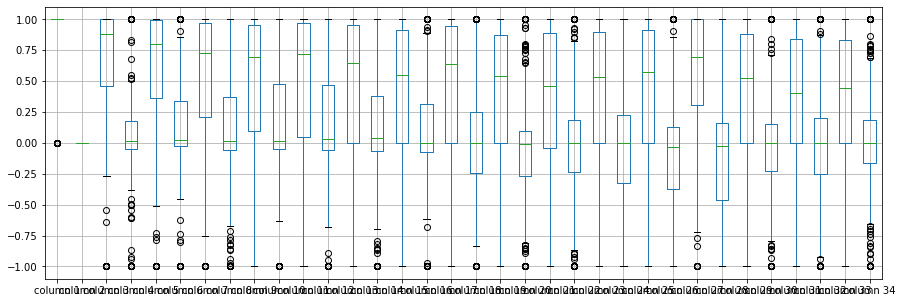

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.887324
column 2     0.000000
column 3     0.634097
column 4     0.051164
column 5     0.577799
column 6     0.109889
column 7     0.539344
column 8     0.106035
column 9     0.520724
column 10    0.167967
column 11    0.498034
column 12    0.170554
column 13    0.409321
column 14    0.094012
column 15    0.327446
column 16    0.081686
column 17    0.396706
column 18    0.004005
column 19    0.331613
column 20   -0.046010
column 21    0.307366
column 22    0.007364
column 23    0.357866
column 24   -0.038213
column 25    0.427369
column 26   -0.091267
column 27    0.549040
column 28   -0.065957
column 29    0.388281
column 30   -0.025810
column 31    0.322419
column 32   -0.006528
column 33    0.373494
column 34    0.016877
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.345062,-0.023522,0.101924,0.135989,0.221858,-0.000746,0.141995,-0.037212,...,-0.059366,0.222230,-0.272617,-0.015128,0.058337,-0.223674,0.239549,-0.090979,0.114303,0.124457
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.345062,NaN,1.000000,0.130599,0.445666,-0.006083,0.426636,0.032053,0.430922,-0.000123,...,0.324707,-0.041689,0.008547,0.129355,0.274255,0.007418,0.298166,0.001727,0.216452,0.051562
column 4,-0.023522,NaN,0.130599,1.000000,-0.078142,-0.116402,0.005719,0.327378,-0.395664,0.128477,...,-0.109126,-0.178170,-0.072713,-0.015520,-0.031534,0.341419,-0.281898,0.001965,-0.142282,0.068793
column 5,0.101924,NaN,0.445666,-0.078142,1.000000,0.044145,0.607408,-0.087333,0.425514,0.002570,...,0.212493,0.035332,0.095647,0.179489,0.251543,-0.076668,0.462743,0.057994,0.438152,-0.136672
column 6,0.135989,NaN,-0.006083,-0.116402,0.044145,1.000000,-0.041474,0.274255,-0.150828,0.231033,...,-0.215890,0.079072,-0.154032,-0.198440,0.010192,-0.054302,-0.062787,0.198551,0.007307,0.257651
column 7,0.221858,NaN,0.426636,0.005719,0.607408,-0.041474,1.000000,-0.228915,0.432091,-0.079830,...,0.272521,0.076283,0.059320,0.029743,0.259626,-0.073967,0.400121,-0.106156,0.546866,-0.070243
column 8,-0.000746,NaN,0.032053,0.327378,-0.087333,0.274255,-0.228915,1.000000,-0.350926,0.349797,...,-0.253714,-0.105185,-0.220791,0.115214,-0.210928,0.089699,-0.205113,0.113474,-0.212985,0.402392
column 9,0.141995,NaN,0.430922,-0.395664,0.425514,-0.150828,0.432091,-0.350926,1.000000,-0.281243,...,0.376281,0.037342,0.180260,0.149096,0.257229,0.050355,0.373276,-0.174142,0.371187,-0.160537
column 10,-0.037212,NaN,-0.000123,0.128477,0.002570,0.231033,-0.079830,0.349797,-0.281243,1.000000,...,-0.260725,0.066760,-0.250086,0.014072,-0.130356,-0.050519,-0.223518,-0.045756,-0.263063,0.164181


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+20,34+20+20,34+20+20+20,34+20+20+20+20,34+20+20+20,34+20+20,34+20,34], vae_layer = False, seed = 200)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 16.271473657517205
Epoch: 1 , loss: 16.188962209792365
Epoch: 2 , loss: 16.190986224583217
Epoch: 3 , loss: 16.093448911394393
Epoch: 4 , loss: 16.10713849748884
Epoch: 5 , loss: 16.102073714846657
Epoch: 6 , loss: 15.947383744376046
Epoch: 7 , loss: 15.856307756333123
Epoch: 8 , loss: 15.955881164187478
Epoch: 9 , loss: 15.963454382760185
Epoch: 10 , loss: 15.699491818745932
Epoch: 11 , loss: 15.639224097842263
Epoch: 12 , loss: 15.39227412995838
Epoch: 13 , loss: 14.961247171674456
Epoch: 14 , loss: 14.459157716660272
Epoch: 15 , loss: 14.111206781296502
Epoch: 16 , loss: 14.204938207353864
Epoch: 17 , loss: 14.205284254891533
Epoch: 18 , loss: 14.166000956580753
Epoch: 19 , loss: 14.155367351713634
Epoch: 20 , loss: 14.131468182518368
Epoch: 21 , loss: 13.896580696105957
Epoch: 22 , loss: 14.006008057367234
Epoch: 23 , loss: 13.959554263523646
Epoch: 24 , loss: 14.133102916535877
Epoch: 25 , loss: 1

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.000000
column 2     0.000000
column 3     1.000000
column 4     1.000000
column 5     0.000000
column 6     0.000000
column 7     0.000000
column 8     0.000000
column 9    -1.000000
column 10   -1.000000
column 11   -0.184385
column 12    0.000000
column 13   -0.190943
column 14    0.000000
column 15   -1.000000
column 16   -1.000000
column 17   -0.178520
column 18   -1.000000
column 19   -1.000000
column 20    1.000000
column 21   -1.000000
column 22    1.000000
column 23    0.000000
column 24    0.000000
column 25    0.000000
column 26    0.000000
column 27    1.000000
column 28   -1.000000
column 29   -1.000000
column 30    1.000000
column 31   -1.000000
column 32    1.000000
column 33   -0.137459
column 34    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.482314,0.333420,0.000000,0.00000,0.000000,0.000000,0.0
1,-0.744517,-0.000337,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.399318,0.000000,0.000000,0.000000,0.000000,0.112166,0.00000,0.000000,0.308605,0.0
2,-0.140439,-0.000335,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.114087,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.224115,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.016775,...,0.000000,0.000000,0.000000,-1.000054,-0.650162,0.000000,0.00000,0.000000,0.000000,0.0
4,-0.289973,0.000000,0.000000,-0.014896,0.000000,-0.055097,0.0,0.182109,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.592267,0.551369,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,-0.324244,0.000000,0.000000,0.000000,-0.114908,0.154094,0.0,0.000000,0.0,0.049635,...,0.000000,0.000000,0.000000,0.015569,0.000000,0.000000,0.00000,0.104755,0.000000,0.0
347,-0.142799,0.000000,-0.191246,0.000000,0.000000,0.051389,0.0,0.000000,0.0,0.000000,...,0.000000,-0.071552,0.000000,0.000000,-0.318268,0.000000,0.00000,0.000000,0.000000,0.0
348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,-0.008083,...,0.000000,0.000000,-0.271089,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
349,0.000000,0.000335,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.052602,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

24.14622631619523

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.3527047415079577

In [19]:
new_df.iloc[66,:]

column 1     1.000000
column 2    -0.000263
column 3     1.000000
column 4     0.280460
column 5     0.442309
column 6     0.024770
column 7     0.432400
column 8    -0.013131
column 9     1.000000
column 10    0.043170
column 11    0.987620
column 12    0.020869
column 13    1.000000
column 14    0.054890
column 15    1.000000
column 16    0.000044
column 17    0.408968
column 18   -0.245980
column 19    0.843710
column 20   -0.086680
column 21    0.369576
column 22    0.041500
column 23    0.999330
column 24    0.273760
column 25    1.000000
column 26   -0.390560
column 27    0.964140
column 28   -0.021740
column 29    0.867470
column 30   -0.006040
column 31    0.945780
column 32   -0.220210
column 33    0.803550
column 34   -0.073290
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.000000,0.000000,0.995390,-0.058890,0.852430,0.023060,0.83398,-0.377080,1.00000,0.037600,...,0.568110,-0.511710,0.410780,0.020634,0.546080,-0.340900,0.42267,-0.544870,0.186410,-0.45300
1,0.255483,-0.000337,1.000000,-0.188290,0.930350,-0.361560,-0.10868,-0.935970,1.00000,-0.045490,...,0.195998,-0.265690,-0.204680,-0.184010,-0.190400,-0.003764,-0.16626,-0.062880,0.171225,-0.02447
2,0.859561,-0.000335,1.000000,-0.033650,1.000000,0.004850,1.00000,-0.120620,0.88965,0.011980,...,0.689367,-0.402200,0.589840,-0.221450,0.431000,-0.173650,0.60436,-0.017685,0.560450,-0.38238
3,1.000000,0.000000,1.000000,-0.451610,1.000000,1.000000,0.71216,-1.000000,0.00000,0.016775,...,1.000000,0.906950,0.516130,-0.000054,0.349838,-0.200990,0.25682,1.000000,-0.323820,1.00000
4,0.710027,0.000000,1.000000,-0.038906,0.941400,0.010213,0.92106,-0.050441,0.77152,-0.163990,...,0.032860,-0.651580,0.132900,-0.532060,0.024310,-0.621970,-0.05707,-0.003463,0.505289,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.675756,0.000000,0.835080,0.082980,0.622482,0.007034,0.84349,-0.055670,0.90441,0.003415,...,0.953780,-0.042020,0.834790,0.016799,1.000000,0.128150,0.86660,-0.002385,0.905460,-0.04307
347,0.857201,0.000000,0.759884,0.004190,0.951830,0.024159,0.93438,-0.019200,0.94590,0.016060,...,0.945200,-0.057942,0.935220,0.049250,0.613322,0.081680,0.94066,-0.000350,0.914830,0.04712
348,1.000000,0.000000,0.947010,-0.000340,0.932070,-0.032270,0.95177,-0.034310,0.95584,0.016377,...,0.939880,0.031930,0.653801,0.025420,0.921200,0.022420,0.92459,0.004420,0.926970,-0.00577
349,1.000000,0.000335,0.906080,-0.016570,0.981220,-0.019890,0.95691,-0.036460,0.85746,0.001100,...,0.963102,-0.020990,0.891470,-0.077600,0.829830,-0.172380,0.96022,-0.037570,0.874030,-0.16243


In [21]:
imputations[-1].to_excel("Ionosphere_C_20(imp).xlsx", index=False, header=False)